# Data Processing and Visualisation in Python Pt II

In this practical, we will add a final few tools to your data processing and visualisation toolbox. We will start by learning how to import and combine a multi-part dataset, before introducing a new data visualisation library, `seaborn`, which is a tool designed to simplify some of the common plotting tasks that you might want to accomplish from a `pandas` dataframe.

## Data Import

We will continue to work with dataset from the last practical, which contains time series data for air pollutants in Cardiff city centre from 2000-2023. In the last practical, the data were provided in two files containing different pollutants which you had to merge together. In this practical, the data are divided into annual files, which we will need to combine into a single dataframe to work with the data. It is quite common for environmental monitoring data to be split up between different files by date (and we see an example of this in one of the policy paper datasets!), so this is a useful skill to learn.

You can see the data files that you'll need to import listed [here](https://github.com/Quantitative-Environmental-Science/data/tree/main/data/M8).

You'll notice that there are 24 of them, each of which can be accessed using the URL `https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_[YEAR].csv`, where you replace `[YEAR]` with the year of interest. The general approach to importing and combining these datasets will be:

1. Create a URL for each of the datasets.
2. Read the data from each URL into a dataframe.
3. Combine all the dataframes into a single dataframe.

You *could* do this manually... writing out the exact same code 24 times to import each dataset... but that would be tedious, and ultimately a waste of time. Python is a programming language, and one of the key features of programming languages is that they allow you to automate repetitive tasks. In this case, we can use a `loop` to automate the process of importing the data.

### Loops

The general structure of a loop is:

```
for variable in list:
    # some code to do something with the variable
```

The start of the loop is identified by `for`, followed by identifying a temporary variable name (`variable`), and the list of items that you want to loop through (`list`). There is then a colon, and a block of indended code that will be executed for each item in the list. The loop ends when the indentation stops.

When you run a loop, the code inside the loop is executed once for each item in the list. Each time the code is executed, the temporary variable is set to the value of the current item in the list, the indented code is run, and then the loop moves on to the next item in the list until they have all been processed. To get an idea of how this works, try running the following code:

```python
for i in [1, 2, 3, 4, 5]:
    print('This is iteration: ', i)
```

In [ ]:
# do it here
for i in [1, 2, 3, 4, 5]:
    print('This is iteration: ', i)

This is iteration:  1
This is iteration:  2
This is iteration:  3
This is iteration:  4
This is iteration:  5


In this case, the temporary variable name is `i`, and the values of the list are `[1, 2, 3, 4, 5]`. Python also has a lot of functions for generating arrays of numbers. You could achieve the same as the code above by running:

```python
for i in range(1, 6):
    print('This is iteration: ', i)
```

where the numbers after range are the number to start and stop the list from. Write similar code below to print out the numbers 2000 to 2023.

In [ ]:
# do it here
for i in range(1, 6):
    print('This is iteration: ', i)

This is iteration:  1
This is iteration:  2
This is iteration:  3
This is iteration:  4
This is iteration:  5


Hopefully you see where this is going... now we have a way to get each year consecutively, we can use this to build the URL for each dataset. To do this, we need to integrate the year within the URL, which means combining a number and some text. We're going to do this using something known as an `f-string`, or a formatted string. This is a special type of string that allows you to insert variables into the string. To create an f-string, you start the string with `f` and then insert the variable name inside curly brackets `{}`. For example:

```python
year = 2023
print(f'The year is {year}')
```

Write a loop that prints out the URL for each of the datasets.

In [ ]:
# do it here
for year in range(2000,2024):
  print(f'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_{year}.csv')


base_url = 'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_[YEAR].csv'

https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2000.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2001.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2002.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2003.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2004.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2005.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2006.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2007.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2008.csv
https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_2009.csv


Now you have a way to access all those datasets, you need to import and save them. To do this, you'll need to import each dataset from each url and save those datasets in a list.

You can do this by creating an empty list before the loop, then using `append` to add each new dataframe to the list. For example:

```python
dataframes = []
for i in range(1, 6):
    dataframes.append(i)
```

will produce a list containing [1,2,3,4,5]. Write a loop that imports each dataset and saves them all in a list (this might take a moment to run, because `pandas` has to download quite a few files!).

In [ ]:
# do it here
dataframes = []
for year in range(2000,2024):
    url = f'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M8/M8_Cardiff_Air_{year}.csv'
    # Read each CSV from the URL and append it to the list
    df = pd.read_csv(url)
    dataframes.append(df)



AttributeError: 'list' object has no attribute 'head'

now you have a list of datasets, the final task is to join them all together in to a single dataset and, as usual, make sure all the `types` of the data are correct.

You can combine all these datasets using the `pd.concat` function, where `concat` is short for [concatenate](https://en.wikipedia.org/wiki/Concatenation). Do this in the cell below, and save the combined dataset as `dat`. Check all the data types are correct.

> **Hint**: when you use `pd.concat`, set the `ignore_index` argument to `True`. This will replace the original indices of the component dataframes with a new one where each row has a unique value. If you don't do this, you'll have trouble later on when you try to plot the data.

In [ ]:
# do it here
import pandas as pd

dat = pd.concat(dataframes, ignore_index=True)
dat['Date']=pd.to_datetime(dat['Date'],format='%Y-%m-%d')
dat.dtypes


,0
Date,datetime64[ns]
Nitrogen dioxide,float64
Status_x,object
PM10 particulate matter (Hourly measured),float64
Status_y,object
PM2.5 particulate matter (Hourly measured),float64
Status.1,object


Now you have a complete dataset that we can use for plotting!

## Plotting with `seaborn`

So far, we've been focussing on plotting with `matplotlib`. This is because `matplotlib` is the most widespread python plotting library, which most other libraries are based on. It is good because it offers you a lot of control over how plots look. It is bad, because you need to really understand what you're doing if you want to make a plot look nice, or plot relatively complex data. The point is: **if you know your way around `matplotlib`, you can plot anything!**

However, there are a lot of other packages out there that are designed to make routine plotting tasks easier. One of these is `seaborn`, which is a library that is designed to make it easier to plot data from `pandas` dataframes. It is built on top of `matplotlib`, so you can still use all the `matplotlib` functions, but it provides a lot of useful shortcuts for common plotting tasks.

As always, the [tutorial](https://seaborn.pydata.org/tutorial.html) is an excellent place to learn what `seaborn` is about. The [example gallery](https://seaborn.pydata.org/examples/index.html) is also a good place to look for inspiration, and see what `seaborn` is capable of.

Import seaborn in the cell below, and make a line plot of `Nitrogen dioxide` by running the following code:

```python
import seaborn as sns
sns.lineplot(data=dat, x='Date', y='Nitrogen dioxide')
```



<Axes: xlabel='Date', ylabel='Nitrogen dioxide'>

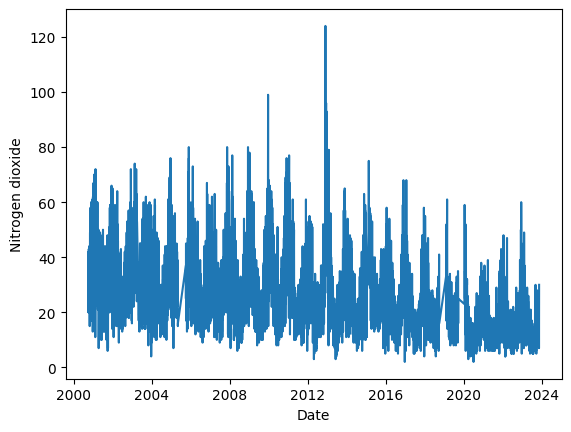

In [ ]:
# do it here
import seaborn as sns
sns.lineplot(data=dat, x='Date', y='Nitrogen dioxide')

The eagle-eyed amongst you will notice that the `sns.lineplot` function returns a `matplotlib.Axes` object. You can interact with this just like you would any other `matplotlib` axes object to add labels, change the limits, etc. using the same `ax.set_` functions that you saw in the last practicals. At this stage, `seaborn` is just a wrapper around `matplotlib` that simplifies plotting from `pandas` dataframes... but it can do much more.

### Time Trends

To see the capabilities of `seaborn`, we're going to have to pre-process the data a little. Specifically, we're going to separate out the `Date` axis to create new columns containing the `year`, `month`, `day` and `day_of_week` of each row. For example:

```python
dat['year'] = dat['Date'].dt.year
```

Create new columns in your dataframe for the `year`, `month`, `day` and `day_of_week` of each row:

In [ ]:
# do it here
dat['year'] = dat['Date'].dt.year
dat['month'] = dat['Date'].dt.month
dat['day'] = dat['Date'].dt.day
dat['day_of_week'] = dat['Date'].dt.day_name()
dat.head()

,Date,Nitrogen dioxide,Status_x,PM10 particulate matter (Hourly measured),Status_y,PM2.5 particulate matter (Hourly measured),Status.1,year,month,day,day_of_week
0,2000-10-01,23.0,V ugm-3,19.0,V ugm-3 (INDIC.GRAV),NaN,NaN,2000,10,1,Sunday
1,2000-10-02,26.0,V ugm-3,27.0,V ugm-3 (INDIC.GRAV),NaN,NaN,2000,10,2,Monday
2,2000-10-03,20.0,V ugm-3,28.0,V ugm-3 (INDIC.GRAV),NaN,NaN,2000,10,3,Tuesday
3,2000-10-04,33.0,V ugm-3,30.0,V ugm-3 (INDIC.GRAV),NaN,NaN,2000,10,4,Wednesday
4,2000-10-05,31.0,V ugm-3,18.0,V ugm-3 (INDIC.GRAV),NaN,NaN,2000,10,5,Thursday


Now we can start to have some fun... Run `lineplot` again, but this time set the `x` argument to `year`:

<Axes: xlabel='year', ylabel='Nitrogen dioxide'>

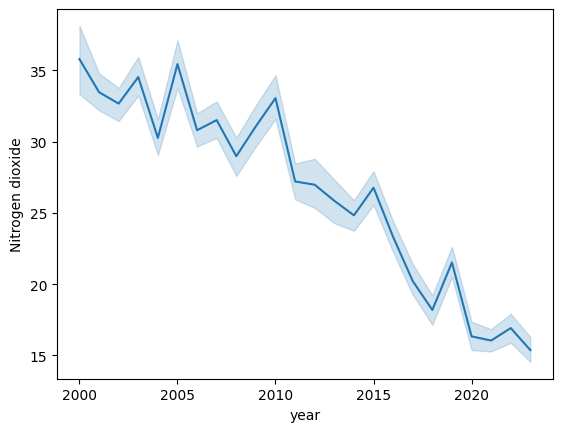

In [ ]:
# do it here
sns.lineplot(data=dat, x='year', y='Nitrogen dioxide')

Here, `seaborn` combines all the data points with a shared value of `year`, and plots the mean and standard deviation of the resulting line. This is similar to what you did in practical 7 with smoothing, but `seaborn` does it automatically! The only potential disadvantage here is that the data are arbitrarily binned into years, rather than calculating a rolling mean.

Nevertheless, this is useful because it immediately allows us to identify a downward trend in the data. Next, we can fit this with a line using `sns.regplot` (`reg`ression `plot`).

Fit a second-order polynomial to the data to the annual average data using `sns.regplot`:

> **Hint**: you'll want to make use of the `x_estimator` argument to show the means and standard deviations of each year (`x_estimator=np.mean`), and you can change the `order` parameter to fit a different order polynomial to the data.


<Axes: xlabel='year', ylabel='Nitrogen dioxide'>

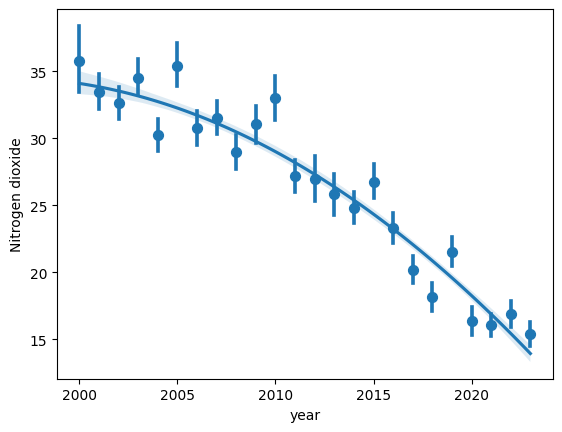

In [ ]:
# do it here
import numpy as np
sns.regplot(data=dat, x='year',y='Nitrogen dioxide',x_estimator=np.mean,order=2)


You can also look at this long-term trend with a few other different plot types:

 - `sns.boxplot` with `x='year'` will show the median and interquartile range for the data each year.
 - `sns.voilinplot` with `x='year'` will show the distribution of the data each year.


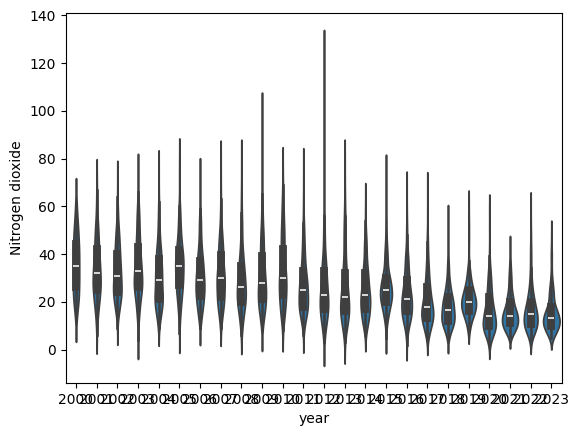

In [ ]:
# try them here, if you like
import matplotlib.pyplot as plt
sns.violinplot(data=dat, x='year',y='Nitrogen dioxide')
plt.show()


These plots show us the long-term trend in the data, but what if we want to dig a little deeper? How is this decrease split across the year? Is there an even decrease across all months? Or is it more pronounced in some months than others?

To answer this, we can use `seaborn` to split the data up by both year *and* month using the `hue` argument. This will plot a separate line for each value of the variable provided to `hue` (i.e. `hue='month` will plot a separate line for each value of `month`).

Creat two plots below, one showing the long-term trend in the data coloured by month, and the other showing the month-by-month trend through each year coloured by year. These plots should share a y axis.

> **Hint**: To create two joined plots you'll want to create two subplots using `matplotlib` (like you have in previous practicals), and pass the axes to `sns.lineplot` using the `ax` argument. You can also set the [`palette` argument](https://seaborn.pydata.org/tutorial/color_palettes.html) if you'd like to change the colour of one of the plots.

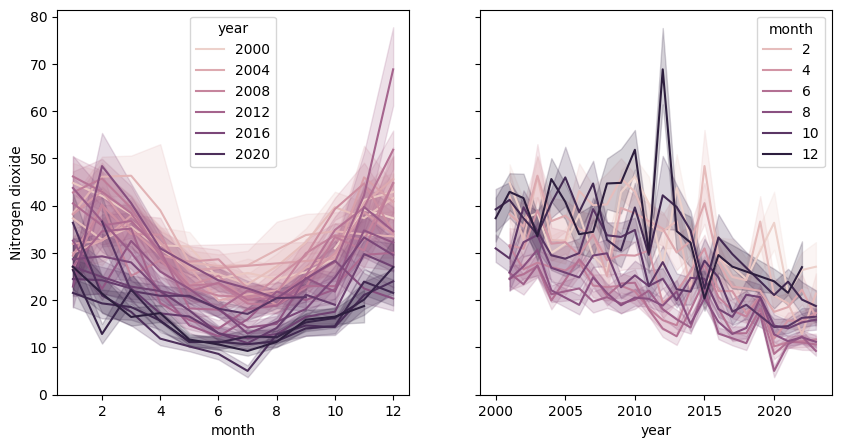

In [ ]:
# do it here
fig, ax = plt.subplots(1, 2, figsize=(10, 5),sharey=True)
ax0,ax1=ax
ax0=sns.lineplot(data=dat, x='month',y='Nitrogen dioxide',hue='year',ax=ax[0])
ax1=sns.lineplot(data=dat, x='year',y='Nitrogen dioxide',hue='month',ax=ax[1])


What do you notice about the data?

In [ ]:
# write your observations here

What about other pollutants? Create a six-panel plot showing the long-term and annual trend for each pollutant, with one pollutant on each row. Each row should share a y-axis, and each column should share an x-axis.

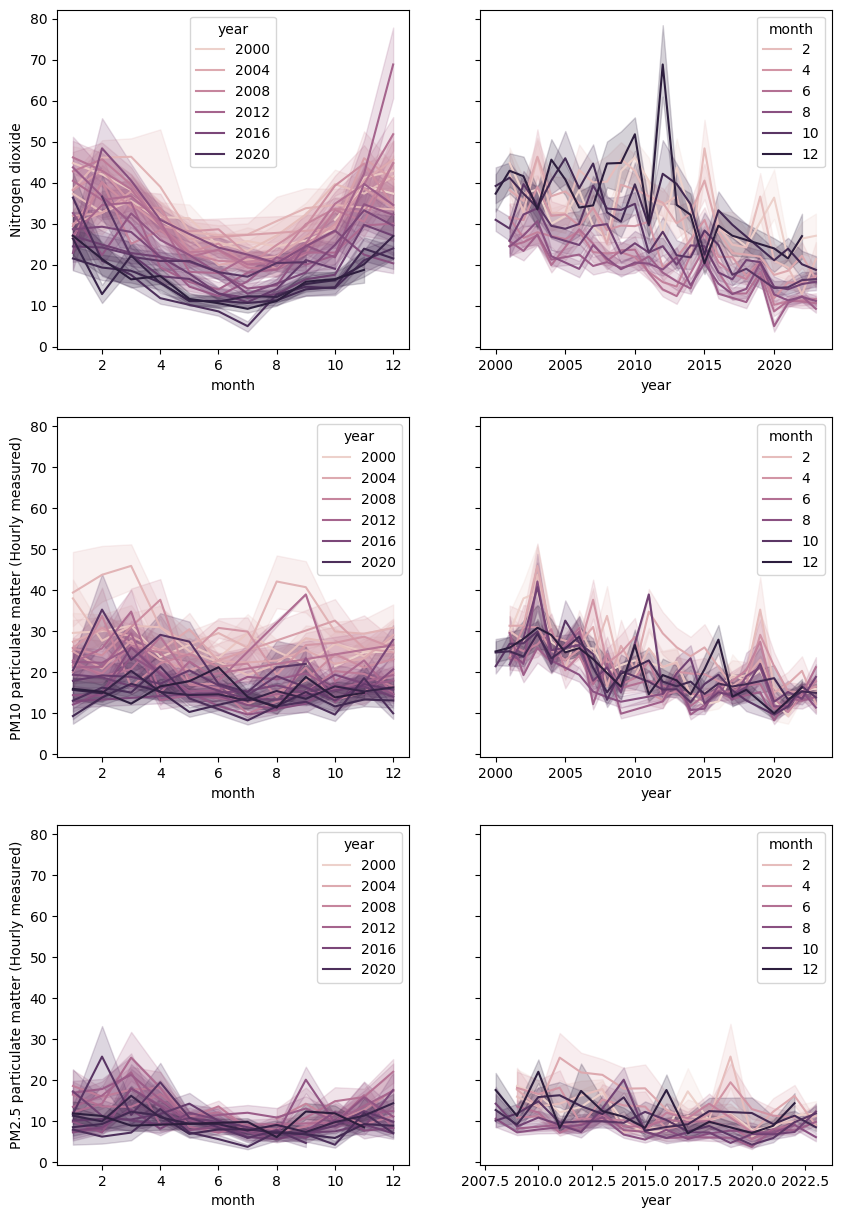

In [ ]:
# do it here

fig, ax = plt.subplots(3, 2, figsize=(10, 15),sharey=True)
ax0, ax1 = ax[0]
ax2, ax3 = ax[1]
ax4, ax5 = ax[2]

ax0=sns.lineplot(data=dat, x='month',y='Nitrogen dioxide',hue='year',ax=ax0)
ax1=sns.lineplot(data=dat, x='year',y='Nitrogen dioxide',hue='month',ax=ax1)

ax2=sns.lineplot(data=dat, x='month',y='PM10 particulate matter (Hourly measured)',hue='year',ax=ax2)
ax3=sns.lineplot(data=dat, x='year',y='PM10 particulate matter (Hourly measured)',hue='month',ax=ax3)
ax4=sns.lineplot(data=dat, x='month',y='PM2.5 particulate matter (Hourly measured)',hue='year',ax=ax4)
ax5=sns.lineplot(data=dat, x='year',y='PM2.5 particulate matter (Hourly measured)',hue='month',ax=ax5)



Do the PM2.5 and PM10 data show the same trend as the NO2 data?

In [ ]:
# write your observations here

The final time trend that it's interesting to look at is the `day_of_week` trend. Can you infer anything about the sources of these pollutants from the day of the week trend?

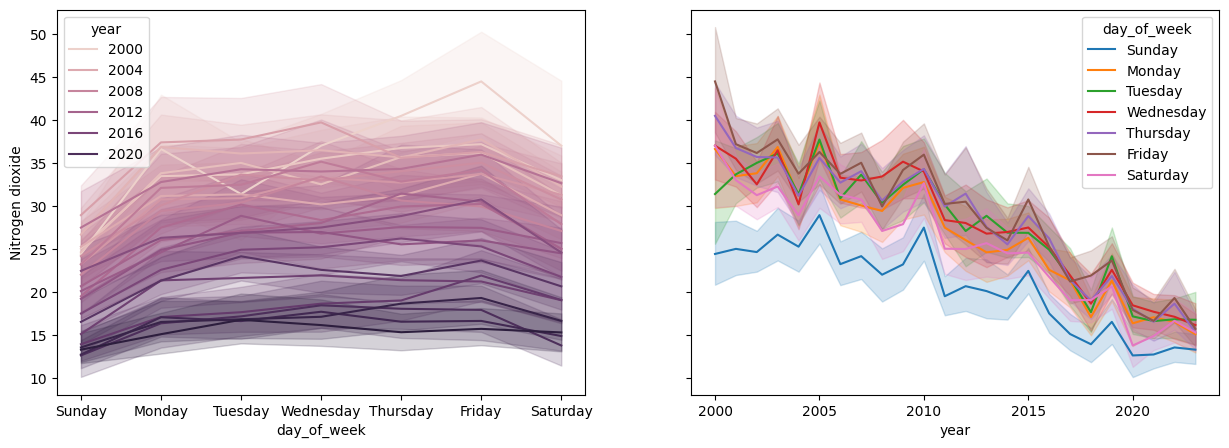

In [ ]:
# do it here
fig, ax = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
ax0,ax1=ax
ax0=sns.lineplot(data=dat, x='day_of_week',y='Nitrogen dioxide',hue='year',ax=ax[0])
ax1=sns.lineplot(data=dat, x='year',y='Nitrogen dioxide',hue='day_of_week',ax=ax[1])


In [ ]:
# write your observations here

### Relationships between variables

Last week, we looked at correlations between variables. This is also possible in `seaborn` using the `pairplot` function. Use this in the cell below to plot the relationship between the pollutant variables in the dataset.

> **Hint**: By default, this plots every column in the dataset against every other column. To select only the pollutant variables, you'll have to use the `vars` argument.

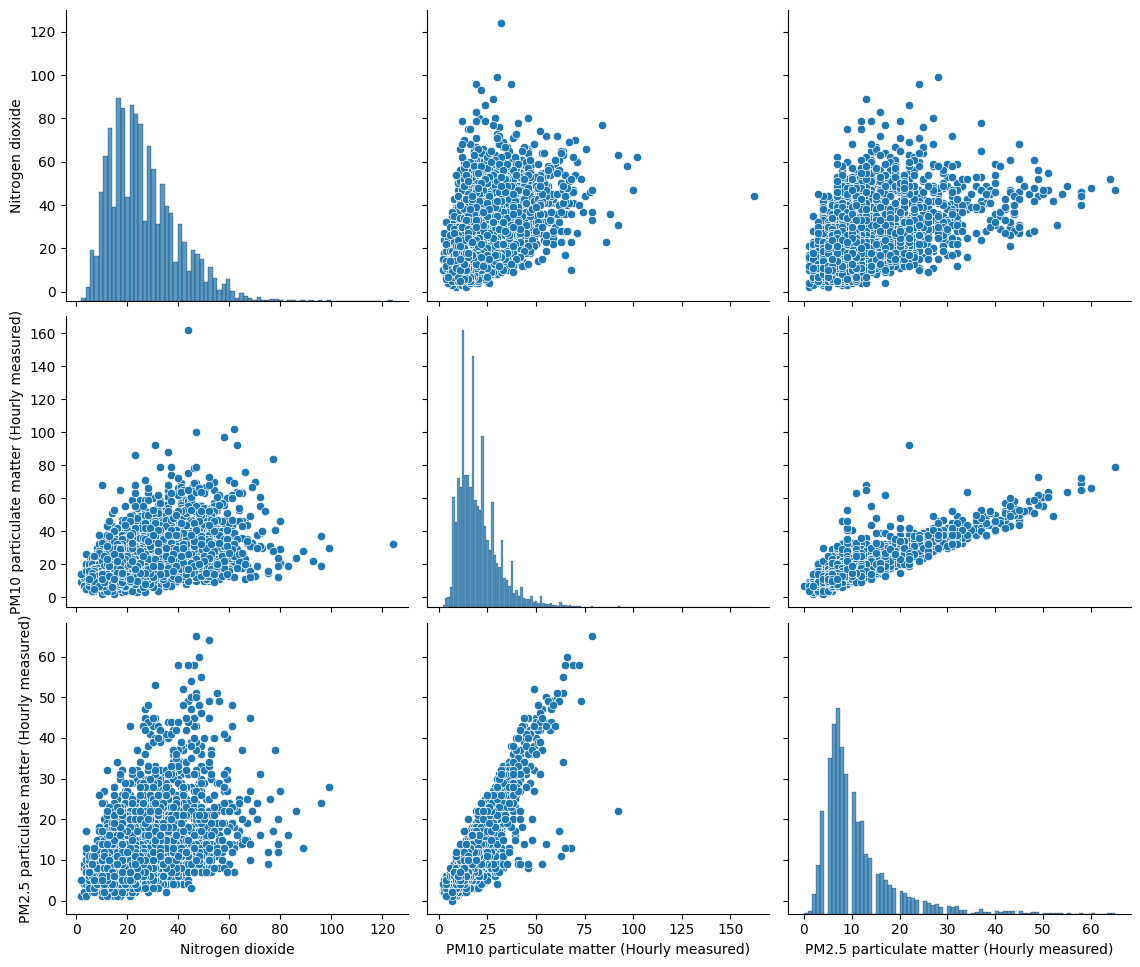

In [ ]:
# do it here
g=sns.pairplot(data=dat,vars=['Nitrogen dioxide','PM10 particulate matter (Hourly measured)','PM2.5 particulate matter (Hourly measured)'])
g.fig.set_size_inches(12, 10)
plt.show()

You've now made a basic pairplot, but you can go a lot further with this. For example, you can change the way the data are plotted in the diagonal plots and the off-diagonal plots. Take a look at the example in the documentation [here](https://seaborn.pydata.org/examples/pair_grid_with_kde.html) and reproduce it for your data in the cell below:

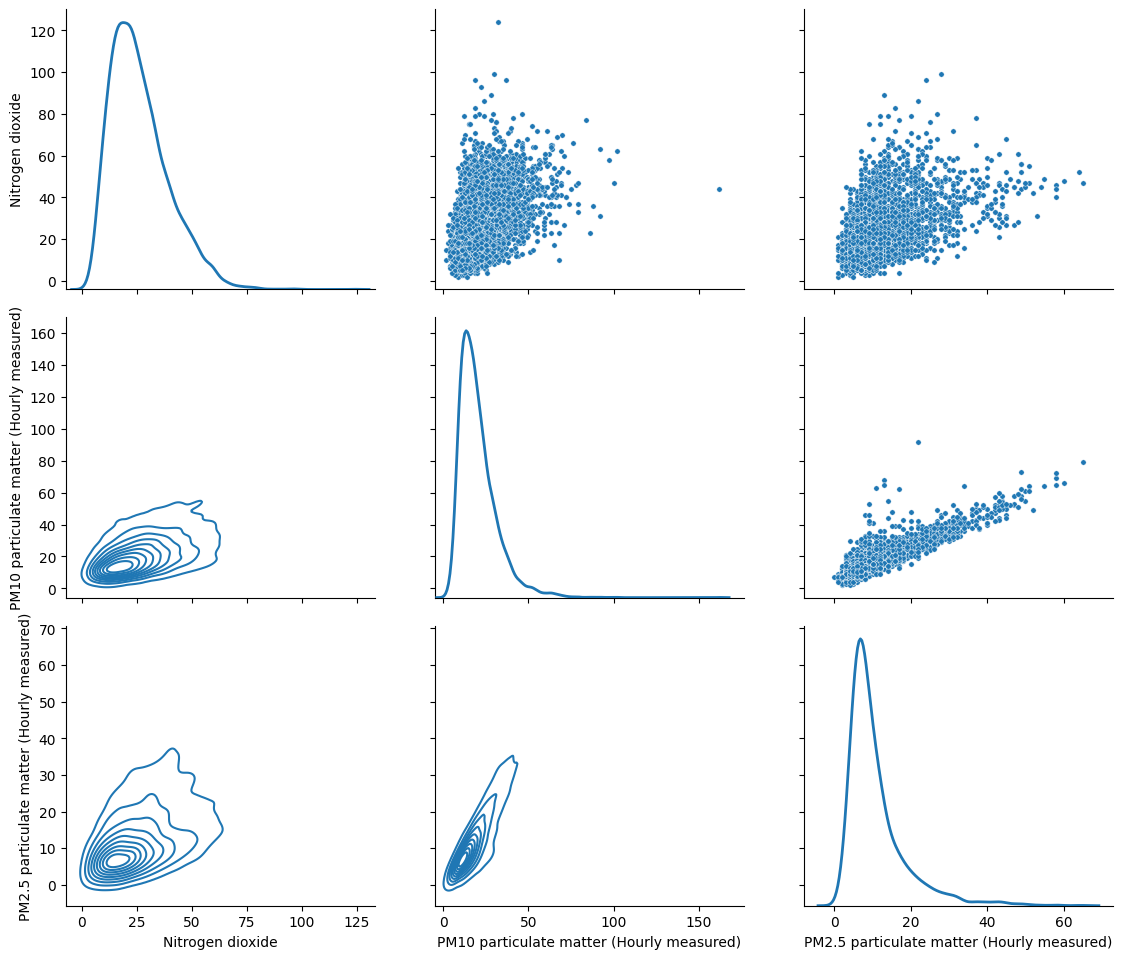

In [ ]:
# do it here
g=sns.PairGrid(data=dat,vars=['Nitrogen dioxide','PM10 particulate matter (Hourly measured)','PM2.5 particulate matter (Hourly measured)'],diag_sharey=False)
g.fig.set_size_inches(12, 10)


g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

### Practical Check-In

Finally, you can also use the `hue` argument here to split the data by another variable. For the check in this week, we'd like you to re-create the plot above, but with the data split by `'weekday'` and `'weekend'`.

> **Hint**: To do this, you'll have to create a new column that classifies the `day_of_week` column as either `weekday` or `weekend`.

We'd also like you do a few other new things, which you'll have to look at documentation and Google to work out:

1. The `kdeplot`s should all be shaded with colours that match the line colours.
2. The off-diagonal `kdeplot` colour should be semi-transparent so you can see the distribution underneath.
3. The scatter plots should have lines of best fit (remember `regplot`?), and have small points of size `3`.
4. The 'weekend' data should be plotted on top of the 'weekday' data.
5. The plot should have a legend identifying the 'weekday' and 'weekend' colours.

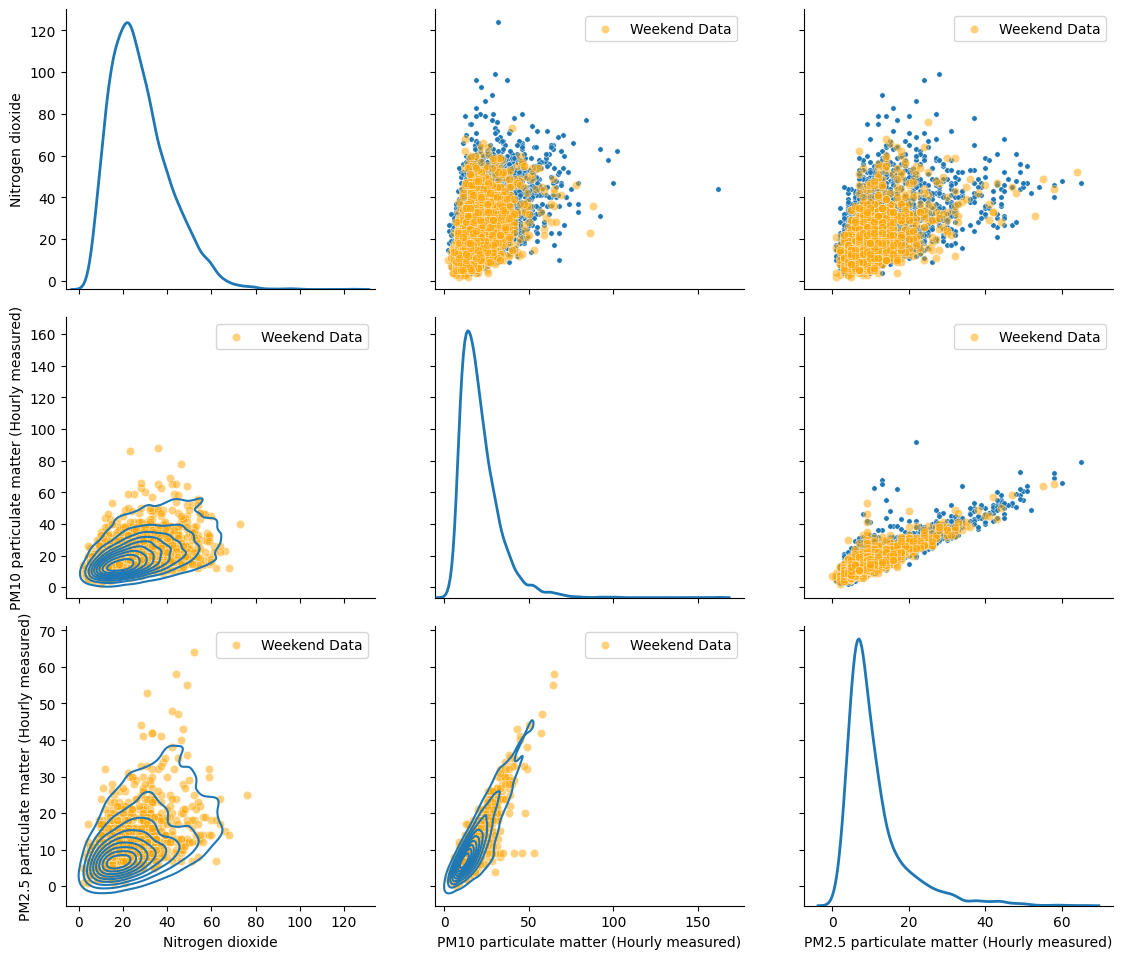

In [ ]:
# do it here

dat['weekend'] = dat['day_of_week'].isin(['Saturday', 'Sunday'])
dat['weekday'] = ~dat['weekend']
dat.head()
#define two new dataframes, seperated by weekend and weekday
weekend_data=dat[dat['weekend']==True]
weekday_data=dat[dat['weekday']==True]



#now imma plot dis
g=sns.PairGrid(data=weekday_data,vars=['Nitrogen dioxide','PM10 particulate matter (Hourly measured)','PM2.5 particulate matter (Hourly measured)'],diag_sharey=False)

g.fig.set_size_inches(12, 10)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

# Iterate through the axes and variable pairs
for i, j in np.ndindex(g.axes.shape):  # Get indices for each subplot
    ax = g.axes[i, j]  # Get the subplot axes
    x_var = g.x_vars[j]  # Get the x variable for this subplot
    y_var = g.y_vars[i]  # Get the y variable for this subplot

    # Skip diagonal subplots (where x_var == y_var)
    if x_var != y_var:
        sns.scatterplot(
            x=weekend_data[x_var],
            y=weekend_data[y_var],
            ax=ax,
            color='orange',
            alpha=0.5,
            label='Weekend Data'
        )




/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)

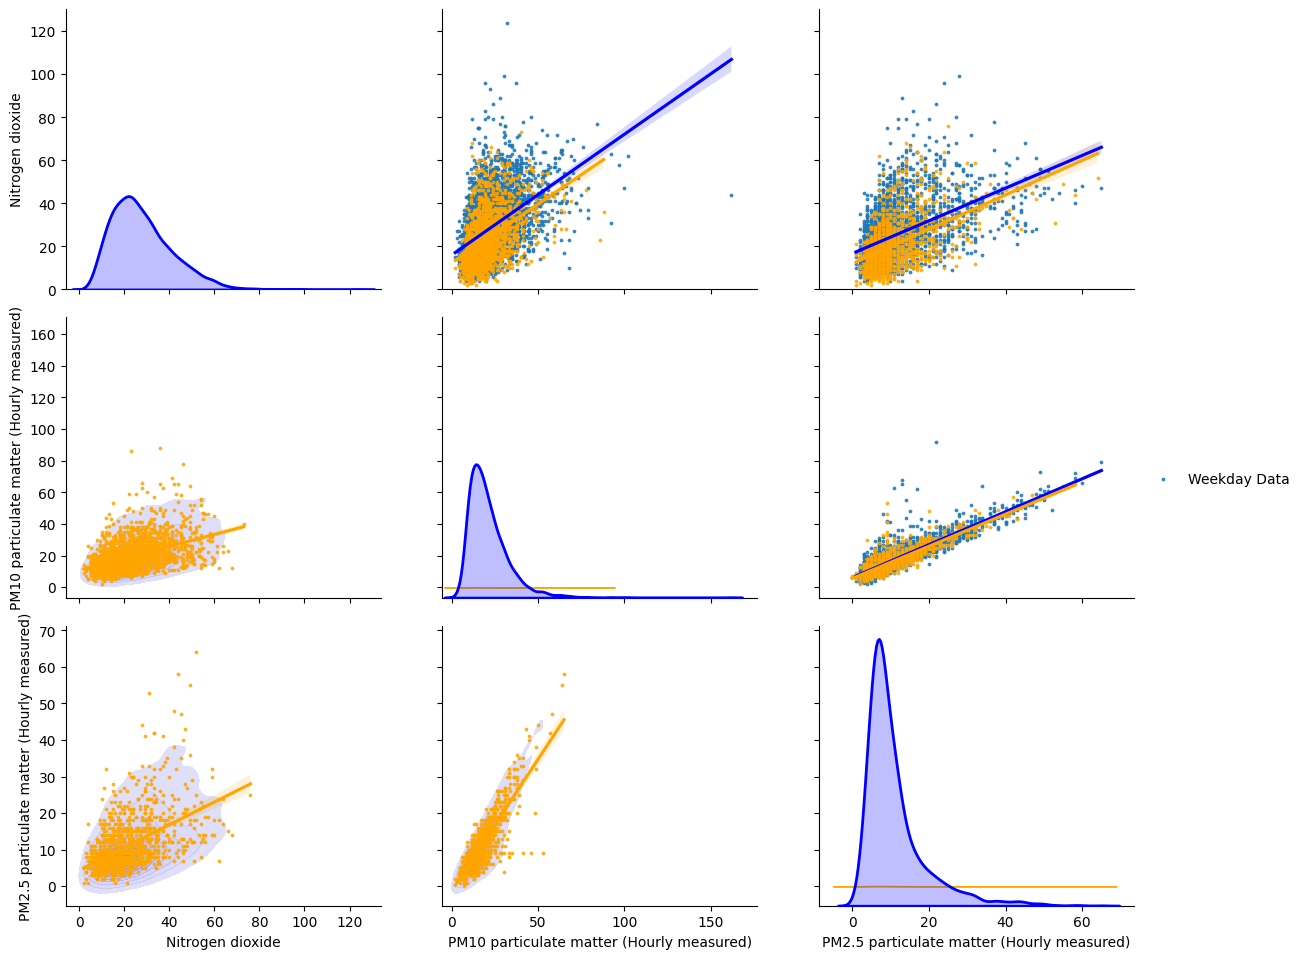

In [ ]:



g = sns.PairGrid(weekday_data, vars=['Nitrogen dioxide', 'PM10 particulate matter (Hourly measured)', 'PM2.5 particulate matter (Hourly measured)'])

# Plot the weekday data
g.fig.set_size_inches(12, 10)
g.map_upper(sns.regplot, scatter_kws={'s': 3}, line_kws={'color': 'blue'}, label='Weekday Data') # Add regression line to scatter plots with small points
g.map_lower(sns.kdeplot, color='blue', shade=True, alpha=0.5, label='Weekday Data') # Shade kdeplots and make them semi-transparent
g.map_diag(sns.kdeplot, lw=2, shade=True, color='blue', label='Weekday Data') # Shade diagonal kdeplots

# Overlay the weekend data
for i in range(len(g.x_vars)):
    for j in range(len(g.y_vars)):
        ax = g.axes[i, j]
        x_var = g.x_vars[j]
        y_var = g.y_vars[i]

        # Use plotting functions on the existing axes (ax) for the weekend data
        if i != j:  # Off-diagonal (scatter plots)
            sns.regplot(x=weekend_data[x_var], y=weekend_data[y_var], ax=ax, scatter_kws={'s': 3}, line_kws={'color': 'orange'}, label='Weekend Data', color='orange')
        else:  # Diagonal (kdeplots)
            sns.kdeplot(x=weekend_data[x_var], ax=ax, shade=True, color='orange', label='Weekend Data')

# Add a legend to the figure (outside the subplots)
g.add_legend()

plt.show()


Save the figure to your computer using the same approach as previous check-ins

``` python
from google.colab import files
plt.savefig("figure_name.png",dpi=300) #Set figure name and the dpi (dots per inch).
files.download("figure_name.png")
```

The downloaded image should then be submitted on Moodle, with the name of the file being your surname.